# Retrieving text with the SQE API

Text retrieval using the SQE API works for both authenticated and unauthenticated requests using a JSON Web Token in the Header of the request. This token is provided in the response to successful login to an activated user account. If protected data is requested without proper authentication, then an access error is returned.

This document will describe access to publicly accessible transcriptions, so the issue of authentication is not relevant for this use case.

## First pull in the dependencies

In [1]:
import sys, json
import pandas as pd
from pprint import pprint

try:
    import requests
except ImportError:
    !conda install --yes --prefix {sys.prefix} requests
    import requests
    
try:
    from genson import SchemaBuilder
except ImportError:
    !conda install --yes --prefix {sys.prefix} genson
    from genson import SchemaBuilder

api = "https://api.qumranica.org/v1"

## Making requests

The SQE API accepts standard HTTP requests to defined endpoints and will always return a JSON object as a response. I highly recommend exploring the API using our interactive [online SQE API documentation](https://api.qumranica.org/swagger "SQE API Portal"). You can get a birds eye view of all the endpoints there, read descriptions of those endpoints, the possible inputs, and the outputs including full specifications of all the data objects used in the communication.


### Finding all available scrolls

Try, for instance, downloading a list of scrolls with the `GET /editions` endpoint.

In [2]:
r = requests.get(f"{api}/editions")
editions = r.json()['editions']
for edition in editions[0:5]: ## Let's only sample a couple entries
    print(json.dumps(edition, indent=2, sort_keys=True, ensure_ascii=False))

[
  {
    "copyright": "© Reinhard G. Kratz \n\nProvided by Reinhard G. Kratz, Ingo Kottsieper, Annette Steudel on the basis of a text provided by the Qumran-Wörterbuch of the Göttingen Academy of Sciences, \nwhich is based upon a preliminary text provided Martin Abegg.\n\nThis work is licensed under the Creative Commons Attribution-ShareAlike 4.0 International License. \nTo view a copy of this license, visit https://creativecommons.org/licenses/by-sa/4.0/legalcode \nor send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.",
    "id": 1,
    "isPublic": true,
    "lastEdit": null,
    "locked": true,
    "name": "1QS",
    "owner": {
      "email": "sqe_api",
      "userId": 1
    },
    "permission": {
      "isAdmin": false,
      "mayWrite": false
    },
    "shares": null,
    "thumbnailUrl": "https://www.qumranica.org/image-proxy?address=http://192.114.7.208:8182/iiif/2/P663-Fg001-R-C02-R01-D15052012-T093457-LR445_ColorCal_both_110209.tif"
  }
]
[
  {
    "

You can also use the little python function `editionIdByManuscriptName` here to find a edition_id in the API response by its canonical manuscript name. The function returns a list, since there may be more than one version of the edition; the first version of the edition listed is the parent from which all others were forked.

In [3]:
def editionIdByManuscriptName(name):
    eid = []
    for edition in editions:
        for version in edition:
            if name == version['name']:
                eid.append(version['id'])
    return eid

manuscriptName = '4Q51'
selectedEdition = editionIdByManuscriptName(manuscriptName)
if len(selectedEdition) > 0:
    selectedEdition = selectedEdition[0]
print(f"The edition id for primary version of {manuscriptName} is {selectedEdition}.")

The edition id for primary version of 4Q51 is 894.


### Information about a specific edition

The API transaction `editions/{editionId}` will provide detailed information about the requested edition including its primary version and any derivative versions.

In [4]:
r = requests.get(f"{api}/editions/{selectedEdition}")
edition = r.json()
print(json.dumps(edition, indent=2, sort_keys=True, ensure_ascii=False))

{
  "others": [],
  "primary": {
    "copyright": "© Reinhard G. Kratz \n\nProvided by Reinhard G. Kratz, Ingo Kottsieper, Annette Steudel on the basis of a text provided by the Qumran-Wörterbuch of the Göttingen Academy of Sciences, \nwhich is based upon a preliminary text provided Martin Abegg.\n\nThis work is licensed under the Creative Commons Attribution-ShareAlike 4.0 International License. \nTo view a copy of this license, visit https://creativecommons.org/licenses/by-sa/4.0/legalcode \nor send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.",
    "id": 894,
    "isPublic": true,
    "lastEdit": null,
    "locked": true,
    "name": "4Q51",
    "owner": {
      "email": "sqe_api",
      "userId": 1
    },
    "permission": {
      "isAdmin": false,
      "mayWrite": false
    },
    "shares": null,
    "thumbnailUrl": "https://www.qumranica.org/image-proxy?address=http://192.114.7.208:8182/iiif/2/P1094-Fg001-R-C01-R01-D03122013-T110917-LR445_ColorCalData

### Trying various endpoints of the API

In [5]:
r = requests.get(f"{api}/editions/{selectedEdition}/artefacts")
artefacts = r.json()['artefacts']
for artefact in artefacts[0:min(len(artefacts), 3)]: ## Let's just look at the first ten
    pprint(artefact, indent=2)

selectedArtefactId = artefacts[0]['id']

{ 'editionId': 894,
  'id': 9929,
  'imagedObjectId': 'IAA-1094-2',
  'mask': {'mask': '', 'transformMatrix': None},
  'name': '4Q51 - V - a',
  'side': 'recto',
  'zOrder': 0}
{ 'editionId': 894,
  'id': 9932,
  'imagedObjectId': 'IAA-1094-2',
  'mask': {'mask': '', 'transformMatrix': None},
  'name': '4Q51 - V - a',
  'side': 'verso',
  'zOrder': 0}
{ 'editionId': 894,
  'id': 9772,
  'imagedObjectId': 'IAA-1094-3',
  'mask': {'mask': '', 'transformMatrix': None},
  'name': '4Q51 - VI - d',
  'side': 'recto',
  'zOrder': 0}


In [6]:
r = requests.get(f"{api}/editions/{selectedEdition}/artefacts/{selectedArtefactId}")
r.json()
# artefacts = r.json()['artefacts']
# for artefact in artefacts[0:min(len(artefacts), 3)]: ## Let's just look at the first ten
#     pprint(artefact, indent=2)

{'editionId': 894,
 'id': 9929,
 'imagedObjectId': 'IAA-1094-2',
 'mask': {'mask': '', 'transformMatrix': None},
 'name': '4Q51 - V - a',
 'side': 'recto',
 'zOrder': 0}

In [7]:
r = requests.get(f"{api}/imaged-objects")
# Doesn't seem to be working correctly
r.json()

{'status': 501, 'type': 'about:blank'}

In [8]:
r = requests.get(f"{api}/imaged-objects/institutions")
r.json()

{'institutions': [{'name': 'IAA'}, {'name': 'IDAM-IAA'}, {'name': 'PAM'}]}

In [9]:
r = requests.get(f"{api}/editions/{selectedEdition}/imaged-objects")
imagedObjects = r.json()['imagedObjects']
selectedImagedObject = imagedObjects[0]
selectedImagedObjectId = selectedImagedObject['id']
selectedImage = selectedImagedObject['recto']['images'][0]
selectedImageId = selectedImage['id']
selectedImage

{'catalogNumber': 10062,
 'id': '17704',
 'lightingDirection': 2,
 'lightingType': 0,
 'master': True,
 'regionInMaster': {'mask': None, 'transformMatrix': None},
 'regionOfMaster': {'mask': None, 'transformMatrix': None},
 'side': 'recto',
 'transformToMaster': None,
 'type': 'color',
 'url': 'https://www.qumranica.org/image-proxy?address=http://192.114.7.208:8182/iiif/2/P1094-Fg001-R-C01-R01-D03122013-T110917-LR445_ColorCalData_IAA_Left_CC110304_110702.tif',
 'waveLength': ['445', '704']}

In [10]:
r = requests.get(f"{api}/editions/{selectedEdition}/imaged-objects/{selectedImagedObjectId}")
selectedImagedObject = r.json()
selectedImagedObject

{'artefacts': None,
 'id': 'IAA-1094-1',
 'recto': {'id': 10062,
  'images': [{'catalogNumber': 10062,
    'id': '17704',
    'lightingDirection': 2,
    'lightingType': 0,
    'master': True,
    'regionInMaster': {'mask': None, 'transformMatrix': None},
    'regionOfMaster': {'mask': None, 'transformMatrix': None},
    'side': 'recto',
    'transformToMaster': None,
    'type': 'color',
    'url': 'https://www.qumranica.org/image-proxy?address=http://192.114.7.208:8182/iiif/2/P1094-Fg001-R-C01-R01-D03122013-T110917-LR445_ColorCalData_IAA_Left_CC110304_110702.tif',
    'waveLength': ['445', '704']},
   {'catalogNumber': 10062,
    'id': '17705',
    'lightingDirection': 2,
    'lightingType': 0,
    'master': False,
    'regionInMaster': {'mask': 'POLYGON((0 0,5412 0,5412 7216,0 7216,0 0))',
     'transformMatrix': None},
    'regionOfMaster': {'mask': 'POLYGON((0 0,5412 0,5412 7216,0 7216,0 0))',
     'transformMatrix': None},
    'side': 'recto',
    'transformToMaster': '{"matrix":

## Information about the transcribed text

Text in the SQE database is divided into sections of (presumably) continuous text called "text fragments".  The text fragments are composed of lines, the lines are further composed of signs. Each sign can be part of one or more ordering schemes, can have one or more interpretations, and can be linked to one or more words.

The GET `editions/{editionId}/text-fragments` endpoint returns the list of text fragments for an edition, in the editor's suggested order.

In [11]:
r = requests.get(f"{api}/editions/{selectedEdition}/text-fragments")
textFragments = r.json()["textFragments"]
for textFragment in textFragments[0:min(len(textFragments), 10)]: ## Let's just look at the first ten
    pprint(textFragment, indent=2)
selectedTextFragment = textFragments[0]["id"]

{'id': 9967, 'name': 'col. 1a'}
{'id': 9968, 'name': 'col. 1b'}
{'id': 9969, 'name': 'col. 1c'}
{'id': 9970, 'name': 'col. 2a_d'}
{'id': 9971, 'name': 'col. 3a_e'}
{'id': 9972, 'name': 'col. 4a_b'}
{'id': 9973, 'name': 'col. 4c'}
{'id': 9974, 'name': 'col. 5a'}
{'id': 9975, 'name': 'col. 5b_c'}
{'id': 9976, 'name': 'col. 6a_b'}


### Transcriptions

There are several different ways to work with transcribed text.  After downloading it with the GET `editions/{editionId}/text-fragments/{textFragmentId}` endpoint, you may want to serialize it into something more human friendly or better suited to your computational analysis.  The transcriptions in the database are a DAG, but this call provides ordered arrays along with the necessary information to parse the DAG. The object returned is fairly complex, so I will go through it step by step. The returned object has the following schema, which is explained in detail below.

In [12]:
r = requests.get(f"{api}/editions/{selectedEdition}/text-fragments/{selectedTextFragment}")
text = r.json()

builder = SchemaBuilder()
builder.add_object(text)
print(json.dumps(builder.to_schema(), indent=2, sort_keys=False, ensure_ascii=False))

{
  "$schema": "http://json-schema.org/schema#",
  "type": "object",
  "properties": {
    "manuscriptId": {
      "type": "integer"
    },
    "editionName": {
      "type": "string"
    },
    "editorId": {
      "type": "integer"
    },
    "licence": {
      "type": "string"
    },
    "editors": {
      "type": "object",
      "properties": {
        "1": {
          "type": "object",
          "properties": {
            "forename": {
              "type": "null"
            },
            "surname": {
              "type": "null"
            },
            "organization": {
              "type": "null"
            }
          },
          "required": [
            "forename",
            "organization",
            "surname"
          ]
        }
      },
      "required": [
        "1"
      ]
    },
    "textFragments": {
      "type": "array",
      "items": {
        "type": "object",
        "properties": {
          "textFragmentId": {
            "type": "integer"
       

An actual object looks like this.

In [13]:
print(json.dumps(text, indent=2, sort_keys=True, ensure_ascii=False))

{
  "editionName": "4Q51",
  "editorId": 1,
  "editors": {
    "1": {
      "forename": null,
      "organization": null,
      "surname": null
    }
  },
  "licence": "© Reinhard G. Kratz \n\nProvided by Reinhard G. Kratz, Ingo Kottsieper, Annette Steudel on the basis of a text provided by the Qumran-Wörterbuch of the Göttingen Academy of Sciences, \nwhich is based upon a preliminary text provided Martin Abegg.\n\nThis work is licensed under the Creative Commons Attribution-ShareAlike 4.0 International License. \nTo view a copy of this license, visit https://creativecommons.org/licenses/by-sa/4.0/legalcode \nor send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.",
  "manuscriptId": 894,
  "textFragments": [
    {
      "editorId": 1,
      "lines": [
        {
          "editorId": 1,
          "lineId": 45821,
          "lineName": "1",
          "signs": [
            {
              "signInterpretations": [
                {
                  "attributes":

## Structure of the text object

The text object contains several top level properties.  It contains a license with the copyright holder and collaborators automatically generated from the user information in the database. It provides a list of editors (this serves as a key for all the editorId properties at all levels of the text object).  And it provides edition name and a unique manuscriptId.

In [14]:
pprint(text, depth=3)

{'editionName': '4Q51',
 'editorId': 1,
 'editors': {'1': {'forename': None, 'organization': None, 'surname': None}},
 'licence': '© Reinhard G. Kratz \n'
            '\n'
            'Provided by Reinhard G. Kratz, Ingo Kottsieper, Annette Steudel '
            'on the basis of a text provided by the Qumran-Wörterbuch of the '
            'Göttingen Academy of Sciences, \n'
            'which is based upon a preliminary text provided Martin Abegg.\n'
            '\n'
            'This work is licensed under the Creative Commons '
            'Attribution-ShareAlike 4.0 International License. \n'
            'To view a copy of this license, visit '
            'https://creativecommons.org/licenses/by-sa/4.0/legalcode \n'
            'or send a letter to Creative Commons, PO Box 1866, Mountain View, '
            'CA 94042, USA.',
 'manuscriptId': 894,
 'textFragments': [{'editorId': 1,
                    'lines': [...],
                    'textFragmentId': 9967,
                    '

### Nested objects

The textFragments property contains a list of text fragments. In this case we asked for only one, so there is only one entity in the list. Each text fragment entity has a list of lines, which provides the line name, the line id, and a list of signs in the line (the signs have been removed here to make it more readable).

In [15]:
pprint(text["textFragments"][0], depth=3)

{'editorId': 1,
 'lines': [{'editorId': 1, 'lineId': 45821, 'lineName': '1', 'signs': [...]}],
 'textFragmentId': 9967,
 'textFragmentName': 'col. 1a'}


#### Lines and Sign interpretation metadata

The line contains a list of signs, each of which will contain a list of interpretations and of possible next interpretations.  The next interpretation ids can be used to reconstruct all possible reading orders of the signs.  The order of signs in the list is the default ordering, which should match the order of the text on the manuscript itself.  Each element will have one or more sign interpretaions in the "signInterpretations" property. These entities have an id a "signInterpretation" which may be a character or may be empty if the sign interpretation has to do with formatting (like a space, or start of damage, etc.).  The formatting metadata associated with the sign interpretation is in the "attributes" entity. Each attribute has an id, a code, and possible a numerical value.  The codes are:

attribute_value_id | name | string_value | description
--- | --- | --- | ---
1 | sign_type | LETTER | Type of char
2 | sign_type | SPACE | Type of char
3 | sign_type | POSSIBLE_VACAT | Type of char
4 | sign_type | VACAT | Type of char
5 | sign_type | DAMAGE | Type of char
6 | sign_type | BLANK LINE | Type of char
7 | sign_type | PARAGRAPH_MARKER | Type of char
8 | sign_type | LACUNA | Type of char
9 | sign_type | BREAK | Type of char
10 | break_type | LINE\_START | Defines a Metasign as marking of line
11 | break_type | LINE\_END | Defines a Metasign as marking of line
12 | break_type | COLUMN\_START | Defines a Metasign as marking of line
13 | break_type | COLUMN\_END | Defines a Metasign as marking of line
14 | break_type | MANUSCRIPT\_START | Defines a Metasign as marking of line
15 | break_type | MANUSCRIPT\_END | Defines a Metasign as marking of line
17 | might_be_wider | TRUE | Set to true if the width of the sign mght be wider than the given width
18 | readability | INCOMPLETE\_BUT\_CLEAR | The trad. DJD marking of readability
19 | readability | INCOMPLETE\_AND\_NOT\_CLEAR | The trad. DJD marking of readability
20 | is_reconstructed | TRUE | true if the letter is totally reconstructed (brackets are not part of the sign stream!)
21 | editorial_flag | CONJECTURE | Opinions of the editor like conjecture
22 | editorial_flag | SHOULD\_BE\_ADDED | Opinions of the editor like conjecture
23 | editorial_flag | SHOULD\_BE\_DELETED | Opinions of the editor like conjecture
24 | correction | OVERWRITTEN | Correction marks added by a scribe
25 | correction | HORIZONTAL\_LINE | Correction marks added by a scribe
26 | correction | DIAGONAL\_LEFT\_LINE | Correction marks added by a scribe
27 | correction | DIAGONAL\_RIGHT\_LINE | Correction marks added by a scribe
28 | correction | DOT\_BELOW | Correction marks added by a scribe
29 | correction | DOT\_ABOVE | Correction marks added by a scribe
30 | correction | LINE\_BELOW | Correction marks added by a scribe
31 | correction | LINE\_ABOVE | Correction marks added by a scribe
32 | correction | BOXED | Correction marks added by a scribe
33 | correction | ERASED | Correction marks added by a scribe
34 | relative_position | ABOVE\_LINE | Position relative to line context
35 | relative_position | BELOW\_LINE | Position relative to line context
36 | relative_position | LEFT\_MARGIN | Position relative to line context
37 | relative_position | RIGHT\_MARGIN | Position relative to line context
38 | relative_position | MARGIN | Position relative to line context
39 | relative_position | UPPER\_MARGIN | Position relative to line context
40 | relative_position | LOWER\_MARGIN | Position relative to line context



In [16]:
trimmedSigns = text["textFragments"][0]["lines"][0]["signs"]
for sign in trimmedSigns[0:10]:
    pprint(sign)

{'signInterpretations': [{'attributes': [{'attributeValueId': 10,
                                          'editorId': 1,
                                          'interpretationAttributeId': 45821,
                                          'sequence': 0,
                                          'value': 0.0},
                                         {'attributeValueId': 12,
                                          'editorId': 1,
                                          'interpretationAttributeId': 141037,
                                          'sequence': 0,
                                          'value': 0.0},
                                         {'attributeValueId': 14,
                                          'editorId': 1,
                                          'interpretationAttributeId': 164730,
                                          'sequence': 0,
                                          'value': 0.0},
                                         {'attributeV

#### Serializing the data to a string

Perhaps the most simple output type for this data would be a string representation.  This can be achieved by iterating over the data and building a string representation. In this example we will omit reconstructed text (i.e., text with an attribute having the id 20, see line 18 below).

In [17]:
def readFragments(text):
    formattedString = ""
    for textFragment in text['textFragments']:
        formattedString += f"\nText fragment {textFragment['textFragmentName']}:\n"
        formattedString = readLines(textFragment, formattedString)
        
    return formattedString

def readLines(textFragment, formattedString):
    for line in textFragment['lines']:
        formattedString += f"line {line['lineName']}:\n"
        formattedString = readSigns(line, formattedString) + "\n"
        
    return formattedString

def readSigns(line, formattedString):
    for signs in line['signs']:
        for signInterpretation in signs['signInterpretations']:
            attributes = list(map(lambda x: x['attributeValueId'], signInterpretation['attributes'])) ## Get a list of attribute ids
            if 20 not in attributes: ## let's omit reconstructions (attribute id 20)
                if 1 in attributes: ## id 1 marks a letter
                    formattedString += signInterpretation['character']
                elif 2 in attributes: ## id 2 marks a space
                    formattedString += " "
                
    return formattedString
        
r = requests.get(f"{api}/editions/{selectedEdition}/text-fragments/{selectedTextFragment + 3}") ## Let's grab a bigger text
text = r.json()

print(readFragments(text))


Text fragment col. 2a_d:
line 1:
רה לאישה עד אשר
line 2:
 את פנ יהוה וישב לפני
line 3:
תיהו נזיר עד עולם כול ימי
line 4:
 עשי הטוב בעיניך שבי עד
line 5:
ה היוצא מפיך ותשב האשה
line 6:
ותו ותעל אותו שילה כאשר
line 7:
בקר משלש ולחם °°°°
line 8:
ת יהוה שילה והנער
line 9:
הזבח אשר
line 10:
שחט
line 11:
י אדני
line 12:
יהוה
line 13:

line 14:
וה כול הימם
line 15:
הו שם ותשתח
line 16:

line 17:
עלץ לבי ביהוה רמה קרני ביה 
line 18:
יא אין קדוש כיה
line 19:
ך ואין צור כאלוהינו
line 20:
תק מפיכם כי אל דעת
line 21:
ם חתה ונשלים אז
line 22:
לקרה ילדה
line 23:
יה מוריד
line 24:
אף 
line 25:

line 26:
נדיב
line 27:
עליהם תבודרך ח
line 28:
נתן נדלר ויברך ש
line 29:
יהוה יחת מרבו מי ק
line 30:
°תם בשלמ°
line 31:
ואל יתל
line 32:

line 33:
ת מש
line 34:
וירעם 
line 35:
משיחו
line 37:
°



#### Serializing the data to a simpler object

We can also serialize the data to a more simple data structure for computational purposes.

In [18]:
r = requests.get(f"{api}/editions/{selectedEdition}/text-fragments/{selectedTextFragment + 3}") ## Let's grab a bigger text
text = r.json()

simplifiedTextObject = {}
for textFragment in text['textFragments']:
    simplifiedTextObject[textFragment["textFragmentName"]] = []
    
    for line in textFragment['lines']:
        lineObject = {}
        lineObject[line['lineName']] = []
        
        for sign in line['signs']:
            for signInterpretation in sign['signInterpretations']:
                attributes = list(map(lambda x: x['attributeValueId'], signInterpretation['attributes'])) ## Get a list of attribute ids
                if 20 not in attributes: ## let's omit reconstructions (attribute id 20)
                    if 1 in attributes: ## id 1 marks a letter
                        lineObject[line['lineName']].append(signInterpretation['character'])
                    elif 2 in attributes: ## id 2 marks a space
                        lineObject[line['lineName']].append(" ")
                        
        simplifiedTextObject[textFragment["textFragmentName"]].append(lineObject)

pprint(simplifiedTextObject, indent=2)

{ 'col. 2a_d': [ { '1': [ 'ר',
                          'ה',
                          ' ',
                          'ל',
                          'א',
                          'י',
                          'ש',
                          'ה',
                          ' ',
                          'ע',
                          'ד',
                          ' ',
                          'א',
                          'ש',
                          'ר']},
                 { '2': [ ' ',
                          'א',
                          'ת',
                          ' ',
                          'פ',
                          'נ',
                          ' ',
                          'י',
                          'ה',
                          'ו',
                          'ה',
                          ' ',
                          'ו',
                          'י',
                          'ש',
                          'ב',
                          ' ',
      

# Extract text for existing images on server

## Read existing images from CS server

In [19]:
import os
from os import listdir
from pathlib import Path

# Folder path on rack-nachum-g01, which has remote mount to the directory on rack-nachum1
folder_path = "/specific/disk1/home/alexeyp/Tibetan_Transductive/Data/DSS/DSS_Fragments/fragments_nojp"
# os.listdir(folder_path)

# Print all fragments images filenames
for filename in Path(folder_path).glob('**/*.png'):
    basename = os.path.basename(filename)
    file_index = ''.join(os.path.splitext(basename)[:-1])
    #print(file_index)


## Try to map filenames to manuscript numbers by thumbnail URL

In [20]:
def versionsByThumbnailUrl(thumbnail_url, dic):
    for edition in editions:
        for version in edition:
            if version['thumbnailUrl'] and thumbnail_url in version['thumbnailUrl']:
                versions = dic.get(thumbnail_url, [])
                versions.append(version)
                dic[thumbnail_url] = versions
    return dic.get(thumbnail_url, None)

mapping = {}
for filename in Path(folder_path).glob('**/*.png'):
    basename = os.path.basename(filename)
    file_index = ''.join(os.path.splitext(basename)[:-1])
    print(file_index)
    versions = versionsByThumbnailUrl(file_index, mapping)
    if versions:
        print( [(v['id'], v['name']) for v in versions])

P109-Fg006-R-C01-R01-D01112012-T142117-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg008-V-C01-R01-D01112012-T144928-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg002-R-C02-R01-D01112012-T130100-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg007-R-C01-R01-D01112012-T142523-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg005-V-C01-R01-D01112012-T141637-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg001-V-C01-R01-D01112012-T124913-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg001-R-C01-R01-D01112012-T124507-LR445 _ColorCalData_IAA_Both_CC110304_110702
[(123, '4Q186')]
P109-Fg002-R-C03-R01-D01112012-T130546-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg002-R-C01-R01-D01112012-T125602-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg002-V-C01-R01-D01112012-T131116-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg008-R-C01-R01-D01112012-T143436-LR445 _ColorCalData_IAA_Both_CC110304_110702
P109-Fg007-V-C01-R01-D01112012-T142956-LR445 _ColorCalData_

P138-Fg003-R-C02-R01-D15052012-T125714-LR445_ColorCal_both_110209
P138-Fg018-R-C02-R01-D15052012-T153708-LR445_ColorCal_both_110209
P138-Fg002-V-C02-R01-D15052012-T125213-LR445_ColorCal_both_110209
P138-Fg014-R-C02-R01-D15052012-T150256-LR445_ColorCal_both_110209
P138-Fg016-V-C02-R01-D15052012-T152349-LR445_ColorCal_both_110209
P138-Fg009-R-C02-R01-D15052012-T140833-LR445_ColorCal_both_110209
P138-Fg001-R-C02-R01-D15052012-T123645-LR445_ColorCal_both_110209
[(93, '4Q158')]
P138-Fg009-V-C02-R01-D15052012-T141241-LR445_ColorCal_both_110209
P138-Fg006-V-C02-R01-D15052012-T133127-LR445_ColorCal_both_110209
P138-Fg001-V-C02-R01-D15052012-T124112-LR445_ColorCal_both_110209
P138-Fg015-R-C02-R01-D15052012-T151131-LR445_ColorCal_both_110209
P138-Fg019-R-C02-R01-D15052012-T154521-LR445_ColorCal_both_110209
P138-Fg018-V-C02-R01-D15052012-T154047-LR445_ColorCal_both_110209
P138-Fg004-V-C02-R01-D15052012-T131147-LR445_ColorCal_both_110209
P138-Fg019-V-C02-R01-D15052012-T154859-LR445_ColorCal_both_1

P4-Fg084-V-C01-R01-D23112014-T112612-ML445 _PSC
P4-Fg070-R-C01-R01-D20112014-T145330-ML445 _PSC
P4-Fg040-R-C01-R01-D20112014-T084032-ML445 _PSC
P4-Fg033-V-C01-R01-D18112014-T155919-ML445 _PSC
P4-Fg050-V-C01-R01-D20112014-T105505-ML445 _PSC
P4-Fg072-V-C01-R01-D20112014-T151304-ML445 _PSC
P4-Fg012-R-C01-R01-D18112014-T110125-ML445 _PSC
P4-Fg043-R-C01-R01-D20112014-T092631-ML445 _PSC
P4-Fg046-V-C01-R01-D20112014-T102252-ML445 _PSC
P4-Fg047-R-C01-R01-D20112014-T102657-ML445 _PSC
P4-Fg097-V-C01-R01-D23112014-T140755-ML445 _PSC
P4-Fg048-R-C01-R01-D20112014-T103458-ML445 _PSC
P4-Fg017-V-C01-R01-D18112014-T115620-ML445 _PSC
P4-Fg062-V-C01-R01-D20112014-T133758-ML445 _PSC
P4-Fg058-V-C01-R01-D20112014-T120610-ML445 _PSC
P4-Fg096-V-C01-R01-D23112014-T135556-ML445 _PSC
P4-Fg069-R-C01-R01-D20112014-T144423-ML445 _PSC
P4-Fg070-V-C01-R01-D20112014-T145724-ML445 _PSC
P4-Fg009-V-C01-R01-D18112014-T103810-ML445 _PSC
P4-Fg003-V-C01-R01-D17112014-T150839-ML445 _PSC
P4-Fg082-R-C01-R01-D23112014-T105700-ML4

P333-Fg013-V-C01-R01-D14042015-T140736-LR445 _PSC
P333-Fg004-R-C01-R01-D14042015-T120012-LR445 _PSC
P333-Fg008-V-C01-R01-D14042015-T131820-LR445 _PSC
P333-Fg014-R-C01-R01-D14042015-T141149-LR445 _PSC
P333-Fg002-R-C01-R01-D14042015-T111835-LR445 _PSC
P333-Fg010-V-C01-R01-D14042015-T133630-LR445 _PSC
P333-Fg001-V-C01-R01-D15042015-T110302-LR445 _PSC
P333-Fg001-R-C01-R01-D15042015-T105629-LR445 _PSC
[(260, '4Q302')]
P333-Fg012-V-C01-R01-D14042015-T135244-LR445 _PSC
P333-Fg004-V-C01-R01-D14042015-T124546-LR445 _PSC
P333-Fg014-V-C01-R01-D14042015-T141652-LR445 _PSC
P333-Fg006-R-C01-R01-D14042015-T125806-LR445 _PSC
P333-Fg002-V-C01-R01-D14042015-T112509-LR445 _PSC
P333-Fg017-R-C01-R01-D14042015-T143635-LR445 _PSC
P333-Fg016-R-C01-R01-D14042015-T142820-LR445 _PSC
P333-Fg018-V-C01-R01-D14042015-T144819-LR445 _PSC
P333-Fg007-R-C01-R01-D14042015-T130655-LR445 _PSC
P333-Fg018-R-C01-R01-D14042015-T144452-LR445 _PSC
P333-Fg008-R-C01-R01-D14042015-T131441-LR445 _PSC
P333-Fg017-V-C01-R01-D14042015-T1

P1118-Fg003-R-C01-R01-D07082013-T122124-LR445_ColorCalData_IAA_Both_CC110304_110702
[(965, '4Q108')]
P1118-Fg001-R-C01-R01-D07082013-T120309-LR445_ColorCalData_IAA_Both_CC110304_110702
[(963, '4Q106')]
P1118-Fg001-V-C01-R01-D07082013-T120726-LR445_ColorCalData_IAA_Both_CC110304_110702
P1118-Fg002-V-C01-R01-D07082013-T121644-LR445_ColorCalData_IAA_Both_CC110304_110702
P1118-Fg002-R-C01-R01-D07082013-T121229-LR445_ColorCalData_IAA_Both_CC110304_110702
PX215-Fg002-R-C01-R01-D21122014-T121425-ML445 _PSC
[(1095, '5/6Hev15')]
PX215-Fg005-V-C01-R03-D21122014-T150639-ML445 _PSC
PX215-Fg001-V-C01-R01-D21122014-T135115-ML445 _PSC
PX215-Fg006-R-C01-R01-D21122014-T124219-ML445 _PSC
PX215-Fg003-R-C01-R01-D21122014-T122334-ML445 _PSC
PX215-Fg003-V-C01-R01-D21122014-T122727-ML445 _PSC
PX215-Fg005-R-C01-R01-D21122014-T141210-ML445 _PSC
PX215-Fg005-R-C01-R03-D21122014-T143825-ML445 _PSC
PX215-Fg005-V-C01-R01-D21122014-T153019-ML445 _PSC
PX215-Fg006-V-C01-R01-D21122014-T124616-ML445 _PSC
PX215-Fg001-R-C

P1097-Fg010-R-C01-R01-D03122013-T145204-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg002-V-C01-R01-D03122013-T134659-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg013-R-C01-R01-D03122013-T151740-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg005-V-C01-R01-D03122013-T141214-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg007-R-C01-R01-D03122013-T142518-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg008-V-C01-R01-D03122013-T143852-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg009-V-C01-R01-D03122013-T144744-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg007-V-C01-R01-D03122013-T142924-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg006-R-C01-R01-D03122013-T141636-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg002-R-C01-R01-D03122013-T134236-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg003-V-C01-R01-D03122013-T135537-LR445_ColorCalData_IAA_Left_CC110304_110702
P1097-Fg001-V-C01-R01-D03122013-T133738-LR445_ColorCalData_IAA_Left_CC110304

289-Fg006-V-C01-R01-D21112011-T091915-LR445_ColorCal_both_110209
289-Fg001-R-C01-R01-D21112011-T083502-LR445_ColorCal_both_110209
[(114, '4Q177')]
289-Fg010-R-C01-R01-D21112011-T095550-LR445_ColorCal_both_110209
289-Fg011-R-C01-R01-D21112011-T095951-LR445_ColorCal_both_110209
289-Fg009-R-C01-R01-D21112011-T094243-LR445_ColorCal_both_110209
289-Fg007-V-C01-R01-D21112011-T093038-LR445_ColorCal_both_110209
P86-Fg033-R-C01-R01-D29092014-T145200-ML445_PSC
P86-Fg017-V-C01-R01-D29092014-T115346-ML445_PSC
P86-Fg014-V-C01-R01-D29092014-T111958-ML445_PSC
P86-Fg012-V-C01-R01-D29092014-T110454-ML445_PSC
P86-Fg031-R-C01-R01-D29092014-T143656-ML445_PSC
P86-Fg013-R-C01-R01-D29092014-T110906-ML445_PSC
P86-Fg021-V-C01-R01-D29092014-T132848-ML445_PSC
P86-Fg020-V-C01-R01-D29092014-T132126-ML445_PSC
P86-Fg029-R-C01-R01-D29092014-T142253-ML445_PSC
P86-Fg009-V-C01-R01-D29092014-T104917-ML445_PSC
P86-Fg005-V-C01-R01-D29092014-T095802-ML445_PSC
P86-Fg038-V-C01-R01-D29092014-T153437-ML445_PSC
P86-Fg035-V-C01-R

P489-Fg015-V-C01-R01-D22082012-T135936-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg011-R-C01-R01-D22082012-T131122-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg010-R-C01-R01-D22082012-T130120-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg015-R-C01-R01-D22082012-T135513-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg006-R-C01-R01-D22082012-T122940-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg006-V-C01-R01-D22082012-T123549-LR445_ColorCalData_IAA_Both_CC110304_110702
P489-Fg012-R-C01-R01-D22082012-T132055-LR445_ColorCalData_IAA_Both_CC110304_110702
P825-Fg044-V-C01-R01-D02032017-T101708-LR445 _PSC
P825-Fg047-R-C01-R01-D02032017-T104303-LR445 _PSC
P825-Fg003-V-C01-R01-D28022017-T121839-LR445 _PSC
P825-Fg043-V-C01-R01-D02032017-T100825-LR445 _PSC
P825-Fg020-R-C01-R01-D28022017-T153833-LR445 _PSC
P825-Fg022-R-C01-R01-D01032017-T085829-LR445 _PSC
P825-Fg027-R-C01-R01-D01032017-T102559-LR445 _PSC
P825-Fg014-R-C01-R01-D28022017-T143741-LR445 _PSC
P825-Fg042-R-C01-R0

PX303-Fg003-R-C01-R01-D05032015-T114036-ML445 _PSC
PX303-Fg002-R-C01-R01-D05032015-T113023-ML445 _PSC
PX303-Fg001-V-C01-R01-D05032015-T112459-ML445 _PSC
PX303-Fg004-V-C01-R01-D08032015-T110757-ML445 _PSC
PX303-Fg005-V-C01-R01-D08032015-T112654-ML445 _PSC
PX303-Fg006-R-C01-R01-D08032015-T113324-ML445 _PSC
PX303-Fg006-V-C01-R01-D08032015-T120502-ML445 _PSC
PX303-Fg004-R-C01-R01-D05032015-T115115-ML445 _PSC
PX303-Fg002-V-C01-R01-D05032015-T113457-ML445 _PSC
PX303-Fg003-V-C01-R01-D05032015-T114459-ML445 _PSC
P847-Fg002-R-C01-R01-D20082012-T120941-LR445_ColorCalData_IAA_Both_CC110304_110702
P847-Fg004-R-C01-R01-D20082012-T123130-LR445_ColorCalData_IAA_Both_CC110304_110702
P847-Fg001-R-C02-R01-D20082012-T135120-LR445_ColorCalData_IAA_Both_CC110304_110702
P847-Fg001-V-C01-R01-D20082012-T140059-LR445_ColorCalData_IAA_Both_CC110304_110702
P847-Fg005-V-C01-R01-D20082012-T124617-LR445_ColorCalData_IAA_Both_CC110304_110702
P847-Fg002-V-C01-R01-D20082012-T121457-LR445_ColorCalData_IAA_Both_CC110304

P460-Fg019-R-C01-R01-D25082013-T094026-LR445_ColorCalData_IAA_Both_CC110304_110702
P460-Fg011-R-C01-R01-D22082013-T154441-LR445_ColorCalData_IAA_Both_CC110304_110702
P460-Fg017-V-C01-R01-D25082013-T092455-LR445_ColorCalData_IAA_Both_CC110304_110702
P460-Fg033-V-C01-R01-D25082013-T123234-LR445_ColorCalData_IAA_Both_CC110304_110702
P460-Fg034-V-C01-R01-D25082013-T124041-LR445_ColorCalData_IAA_Both_CC110304_110702
P460-Fg020-R-C01-R01-D25082013-T094841-LR445_ColorCalData_IAA_Both_CC110304_110702
P699-Fg011-V-C01-R01-D06012014-T110854-LR445_ColorCalData_IAA_Left_CC110304_110702
P699-Fg002-V-C01-R01-D06012014-T095006-LR445_ColorCalData_IAA_Left_CC110304_110702
P699-Fg014-V-C01-R01-D06012014-T113946-LR445_ColorCalData_IAA_Left_CC110304_110702
P699-Fg008-R-C01-R01-D06012014-T103910-LR445_ColorCalData_IAA_Left_CC110304_110702
P699-Fg003-V-C01-R01-D06012014-T095827-LR445_ColorCalData_IAA_Left_CC110304_110702
P699-Fg002-R-C01-R01-D06012014-T094621-LR445_ColorCalData_IAA_Left_CC110304_110702
P699

P299-Fg003-R-C05-R04-D14112012-T094743-LR445 _ColorCalData_IAA_Both_CC110304_110702
P299-Fg001-R-C05-R04-D14112012-T093018-LR445 _ColorCalData_IAA_Both_CC110304_110702
[(91, '4Q156')]
P897-Fg018-V-C01-R01-D30052013-T121117-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg004-V-C01-R01-D27052013-T135239-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg010-R-C01-R01-D30052013-T103320-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg008-V-C01-R01-D30052013-T085508-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg019-R-C01-R01-D30052013-T121534-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg002-R-C01-R01-D27052013-T132732-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg022-R-C01-R01-D30052013-T123849-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg016-V-C01-R01-D30052013-T115407-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg014-V-C01-R01-D30052013-T113450-LR445_ColorCalData_IAA_Both_CC110304_110702
P897-Fg011-R-C01-R01-D30052013-T104329-LR445_ColorCalData_IAA_Both_CC

P459-Fg014-V-C01-R01-D24062013-T111222-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg038-R-C01-R01-D24062013-T092635-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg029-V-C01-R01-D24062013-T141613-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg009-V-C01-R01-D24062013-T100234-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg015-V-C01-R01-D24062013-T112129-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg005-V-C01-R01-D23062013-T135210-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg026-R-C01-R01-D24062013-T134618-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg025-V-C01-R01-D24062013-T134202-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg004-V-C01-R01-D23062013-T134352-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg032-R-C01-R01-D24062013-T144252-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg017-V-C01-R01-D24062013-T113948-LR445_ColorCalData_IAA_Both_CC110304_110702
P459-Fg013-R-C01-R01-D24062013-T105858-LR445_ColorCalData_IAA_Both_CC110304_110702
P459

P387-Fg018-R-C01-R01-D17122012-T104944-LR445 _ColorCalData_IAA_Both_CC110304_110702
._P387-Fg018-R-C01-R01-D17122012-T104944-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg023-R-C01-R01-D17122012-T113352-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg016-R-C01-R01-D17122012-T103016-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg029-R-C01-R01-D17122012-T122418-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg013-V-C01-R01-D17122012-T100857-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg037-V-C01-R01-D17122012-T135810-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg031-R-C01-R01-D17122012-T125903-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg017-R-C01-R01-D17122012-T103827-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg001-R-C01-R01-D16122012-T145123-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg042-R-C01-R01-D17122012-T152732-LR445 _ColorCalData_IAA_Both_CC110304_110702
P387-Fg015-R-C01-R01-D17122012-T102200-LR445 _ColorCalData_IAA_Both_CC1103

P1156-Fg019-V-C01-R01-D13052015-T120026-LR445 _PSC
P1156-Fg008-V-C01-R01-D13052015-T095500-LR445 _PSC
P1156-Fg036-V-C01-R01-D13052015-T141122-LR445 _PSC
P1156-Fg001-R-C01-R01-D13052015-T085153-LR445 _PSC
P1156-Fg034-R-C01-R01-D13052015-T135338-LR445 _PSC
P1156-Fg008-R-C01-R01-D13052015-T095011-LR445 _PSC
P1156-Fg005-V-C01-R01-D13052015-T093145-LR445 _PSC
P1156-Fg041-R-C01-R01-D13052015-T144453-LR445 _PSC
P547-Fg002-V-C01-R01-D05052016-T141737-LR445 _PSC
P547-Fg002-R-C01-R01-D05052016-T141355-LR445 _PSC
P547-Fg001-R-C01-R01-D05052016-T140358-LR445 _PSC
[(1294, 'WD32')]
P547-Fg004-V-C01-R01-D05052016-T143610-LR445 _PSC
P547-Fg003-R-C01-R01-D05052016-T142220-LR445 _PSC
P547-Fg003-V-C01-R01-D05052016-T142607-LR445 _PSC
P547-Fg004-R-C01-R01-D05052016-T143008-LR445 _PSC
P547-Fg001-V-C01-R01-D05052016-T140805-LR445 _PSC
P.911-Fg004-R-C01-R01-D18072013-T100533-LR445_ColorCalData_IAA_Both_CC110304_110702
P.911-Fg006-R-C01-R01-D18072013-T101140-LR445_ColorCalData_IAA_Both_CC110304_110702
P123-Fg

P310-Fg014-V-C01-R01-D20112012-T083908-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg008-R-C01-R01-D18112012-T151344-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg007-V-C01-R01-D18112012-T150936-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg004-V-C01-R01-D18112012-T144423-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg009-V-C01-R01-D18112012-T152535-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg014-R-C01-R01-D20112012-T083504-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg010-V-C01-R01-D18112012-T153444-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg007-R-C01-R01-D18112012-T150558-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg013-V-C01-R01-D20112012-T083008-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg006-R-C01-R01-D18112012-T145750-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg003-V-C01-R01-D18112012-T143632-LR445 _ColorCalData_IAA_Both_CC110304_110702
P310-Fg005-R-C01-R01-D18112012-T144840-LR445 _ColorCalData_IAA_Both_CC110304

P584-Fg001-V-C01-R01-D03022015-T130928-ML445 _PSC
P584-Fg026-V-C01-R01-D04022015-T144236-ML445 _PSC
P584-Fg016-R-C01-R01-D04022015-T112107-ML445 _PSC
P584-Fg009-V-C01-R01-D03022015-T133954-ML445 _PSC
P584-Fg028-R-C01-R01-D05022015-T095842-ML445 _PSC
P584-Fg011-V-C01-R01-D03022015-T141749-ML445 _PSC
P584-Fg025-R-C01-R01-D04022015-T142727-ML445 _PSC
P584-Fg015-R-C01-R01-D03022015-T145128-ML445 _PSC
P584-Fg022-R-C01-R01-D04022015-T140315-ML445 _PSC
P584-Fg019-R-C01-R01-D04022015-T133922-ML445 _PSC
P584-Fg004-R-C01-R01-D03022015-T123838-ML445 _PSC
P584-Fg011-R-C01-R01-D03022015-T141416-ML445 _PSC
P584-Fg021-V-C01-R01-D04022015-T135857-ML445 _PSC
P584-Fg023-R-C01-R01-D04022015-T141140-ML445 _PSC
P584-Fg001-R-C01-R01-D03022015-T130502-ML445 _PSC
[(98, '4Q163')]
P584-Fg012-R-C01-R01-D03022015-T142236-ML445 _PSC
P584-Fg010-R-C01-R01-D03022015-T140620-ML445 _PSC
P584-Fg028-V-C01-R01-D05022015-T100203-ML445 _PSC
P584-Fg009-R-C01-R01-D03022015-T133620-ML445 _PSC
P584-Fg027-V-C01-R01-D04022015-T14

P502-Fg025-V-C01-R01-D01052014-T151000-LR445_PSC
P502-Fg015-R-C01-R01-D01052014-T134828-LR445_PSC
P502-Fg030-R-C01-R01-D01052014-T154516-LR445_PSC
P502-Fg052-V-C01-R01-D04052014-T115222-LR445_PSC
P502-Fg051-V-C01-R01-D04052014-T114459-LR445_PSC
P502-Fg002-V-C01-R01-D01052014-T102130-LR445_PSC
P502-Fg029-R-C01-R01-D01052014-T153748-LR445_PSC
P502-Fg004-V-C01-R01-D01052014-T115423-LR445_PSC
P502-Fg045-V-C01-R01-D04052014-T104518-LR445_PSC
P502-Fg017-V-C01-R01-D01052014-T140744-LR445_PSC
P502-Fg031-R-C01-R01-D04052014-T084713-LR445_PSC
P502-Fg044-V-C01-R01-D04052014-T103554-LR445_PSC
P502-Fg032-R-C01-R01-D04052014-T085454-LR445_PSC
P502-Fg069-R-C01-R01-D04052014-T135942-LR445_PSC
P502-Fg013-R-C01-R01-D01052014-T133336-LR445_PSC
P502-Fg012-R-C01-R01-D01052014-T125557-LR445_PSC
P502-Fg037-R-C01-R01-D04052014-T093320-LR445_PSC
P502-Fg023-R-C01-R01-D01052014-T145106-LR445_PSC
P502-Fg063-V-C01-R01-D04052014-T131827-LR445_PSC
P502-Fg027-R-C01-R01-D01052014-T152217-LR445_PSC
P502-Fg069-V-C01-R01

P731-Fg019-V-C01-R01-D26052016-T150212-LR445 _PSC
P731-Fg012-V-C01-R01-D26052016-T122329-LR445 _PSC
P731-Fg029-R-C01-R01-D29052016-T121455-LR445 _PSC
P731-Fg027-V-C01-R01-D29052016-T103429-LR445 _PSC
P731-Fg009-V-C01-R01-D26052016-T113435-LR445 _PSC
P731-Fg015-R-C01-R01-D26052016-T124524-LR445 _PSC
P731-Fg017-V-C01-R01-D26052016-T144037-LR445 _PSC
P731-Fg032-V-C01-R01-D29052016-T130527-LR445 _PSC
P731-Fg003-V-C01-R01-D25052016-T135340-LR445 _PSC
P731-Fg010-V-C01-R01-D26052016-T114256-LR445 _PSC
P731-Fg017-R-C01-R01-D26052016-T131342-LR445 _PSC
P731-Fg036-R-C01-R01-D29052016-T134753-LR445 _PSC
P731-Fg026-R-C01-R01-D29052016-T102133-LR445 _PSC
P731-Fg030-R-C01-R01-D29052016-T123712-LR445 _PSC
P731-Fg014-R-C01-R01-D26052016-T123653-LR445 _PSC
P731-Fg013-V-C01-R01-D26052016-T123209-LR445 _PSC
P731-Fg038-R-C01-R01-D29052016-T140443-LR445 _PSC
P731-Fg037-V-C01-R01-D29052016-T140019-LR445 _PSC
P731-Fg032-R-C01-R01-D29052016-T130100-LR445 _PSC
P731-Fg027-R-C01-R01-D29052016-T103014-LR445 _PSC


P753-Fg007-V-C01-R01-D08062014-T113622-LR445_PSC
P753-Fg019-V-C01-R01-D08062014-T134552-LR445_PSC
P753-Fg012-R-C01-R01-D08062014-T121520-LR445_PSC
P753-Fg046-R-C01-R01-D09062014-T130550-LR445_PSC
P753-Fg018-V-C01-R01-D08062014-T132645-LR445_PSC
P753-Fg011-V-C01-R01-D08062014-T121104-LR445_PSC
P753-Fg041-V-C01-R01-D09062014-T114234-LR445_PSC
P753-Fg033-V-C01-R01-D09062014-T091922-LR445_PSC
P753-Fg039-V-C01-R01-D09062014-T105346-LR445_PSC
P753-Fg030-V-C01-R01-D08062014-T154218-LR445_PSC
P753-Fg018-R-C01-R01-D08062014-T132250-LR445_PSC
P753-Fg025-V-C01-R01-D08062014-T143730-LR445_PSC
P753-Fg025-R-C01-R01-D08062014-T143345-LR445_PSC
P753-Fg043-R-C01-R01-D09062014-T124322-LR445_PSC
P753-Fg030-R-C01-R01-D08062014-T153848-LR445_PSC
P753-Fg045-R-C01-R01-D09062014-T125840-LR445_PSC
P753-Fg042-V-C01-R01-D09062014-T115030-LR445_PSC
P753-Fg007-R-C01-R01-D08062014-T113224-LR445_PSC
P753-Fg044-R-C01-R01-D09062014-T125113-LR445_PSC
P753-Fg010-R-C01-R01-D08062014-T115844-LR445_PSC
P753-Fg012-V-C01-R01

P557-Fg116-V-C01-R01-D29102014-T135350-ML445 _PSC
P557-Fg081-V-C01-R01-D28102014-T155209-ML445 _PSC
P557-Fg069-V-C01-R01-D28102014-T135944-ML445 _PSC
P557-Fg049-R-C01-R01-D28102014-T100201-ML445 _PSC
P557-Fg099-R-C01-R01-D29102014-T105041-ML445 _PSC
P557-Fg015-R-C01-R01-D26102014-T142040-ML445 _PSC
P557-Fg111-V-C01-R01-D29102014-T124943-ML445 _PSC
P557-Fg032-R-C01-R01-D27102014-T131707-ML445 _PSC
P557-Fg074-R-C01-R01-D28102014-T144056-ML445 _PSC
P557-Fg029-V-C01-R01-D27102014-T125536-ML445 _PSC
P557-Fg104-R-C01-R01-D29102014-T114418-ML445 _PSC
P557-Fg008-R-C01-R01-D26102014-T124452-ML445 _PSC
P557-Fg001-R-C01-R01-D26102014-T110205-ML445 _PSC
[(1295, 'WD33')]
P557-Fg041-V-C01-R01-D27102014-T152324-ML445 _PSC
P557-Fg012-V-C01-R01-D26102014-T132310-ML445 _PSC
P557-Fg119-R-C01-R01-D29102014-T142348-ML445 _PSC
P557-Fg046-V-C01-R01-D28102014-T094055-ML445 _PSC
P557-Fg022-V-C01-R01-D27102014-T094154-ML445 _PSC
P557-Fg059-R-C01-R01-D28102014-T113901-ML445 _PSC
P557-Fg006-V-C01-R01-D26102014-T1

PX82-X83-Fg016-V-C01-R01-D31122015-T124250-LR445 _PSC
P76-Fg010-R-C01-R01-D05082014-T105754-LR445_PSC
P76-Fg030-V-C01-R01-D05082014-T142942-LR445_PSC
P76-Fg004-R-C01-R01-D05082014-T095825-LR445_PSC
P76-Fg024-R-C01-R01-D05082014-T133600-LR445_PSC
P76-Fg002-R-C01-R01-D05082014-T094200-LR445_PSC
P76-Fg043-R-C01-R01-D06082014-T090453-LR445_PSC
P76-Fg003-V-C01-R01-D05082014-T095420-LR445_PSC
P76-Fg022-R-C01-R01-D05082014-T132134-LR445_PSC
P76-Fg020-R-C01-R01-D05082014-T130650-LR445_PSC
P76-Fg056-V-C01-R01-D06082014-T105435-LR445_PSC
P76-Fg056-R-C01-R01-D06082014-T105110-LR445_PSC
P76-Fg044-R-C01-R01-D06082014-T091219-LR445_PSC
P76-Fg036-V-C01-R01-D05082014-T151623-LR445_PSC
P76-Fg003-R-C01-R01-D05082014-T095046-LR445_PSC
P76-Fg047-V-C01-R01-D06082014-T094238-LR445_PSC
P76-Fg053-R-C01-R01-D06082014-T102759-LR445_PSC
P76-Fg059-R-C01-R01-D06082014-T112156-LR445_PSC
P76-Fg039-V-C01-R01-D05082014-T154211-LR445_PSC
P76-Fg042-R-C01-R01-D06082014-T085736-LR445_PSC
P76-Fg026-V-C01-R01-D05082014-T135

P471-Fg011-V-C01-R01-D13082013-T140342-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg022-R-C01-R01-D14082013-T091012-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg001-R-C01-R01-D13082013-T104133-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg005-R-C01-R01-D13082013-T112326-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg010-V-C01-R01-D13082013-T134858-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg017-V-C01-R01-D13082013-T150716-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg020-R-C01-R01-D13082013-T155357-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg013-R-C01-R01-D13082013-T141903-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg012-R-C01-R01-D13082013-T140901-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg018-R-C01-R01-D13082013-T153259-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg003-V-C01-R01-D13082013-T110925-LR445_ColorCalData_IAA_Both_CC110304_110702
P471-Fg003-R-C01-R01-D13082013-T110459-LR445_ColorCalData_IAA_Both_CC110304_110702
P471

P281-Fg011-V-C01-R01-D20122012-T111701-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg025-R-C01-R01-D20122012-T151620-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg023-V-C01-R01-D20122012-T150332-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg022-V-C01-R01-D20122012-T145426-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg014-V-C01-R01-D20122012-T120043-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg014-R-C01-R01-D20122012-T115618-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg010-R-C01-R01-D20122012-T110052-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg017-R-C01-R01-D20122012-T122627-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg024-R-C01-R01-D20122012-T150800-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg005-R-C01-R01-D20122012-T100304-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg022-R-C01-R01-D20122012-T144833-LR445 _ColorCalData_IAA_Both_CC110304_110702
P281-Fg001-V-C01-R01-D20122012-T093220-LR445 _ColorCalData_IAA_Both_CC110304

P24-Fg004-V-C01-R01-D30122014-T102408-ML445 _PSC
P24-Fg022-V-C02-R01-D30122014-T140924-ML445 _PSC
P24-Fg037-V-C01-R01-D30122014-T164745-ML445 _PSC
P24-Fg024-V-C02-R01-D30122014-T144051-ML445 _PSC
P24-Fg015-R-C02-R01-D30122014-T130004-ML445 _PSC
P24-Fg014-R-C02-R01-D30122014-T125205-ML445 _PSC
P24-Fg047-R-C01-R01-D31122014-T092314-ML445 _PSC
P24-Fg045-V-C01-R01-D30122014-T175514-ML445 _PSC
P24-Fg007-R-C01-R01-D30122014-T104416-ML445 _PSC
P24-Fg029-R-C02-R01-D30122014-T153441-ML445 _PSC
P24-Fg015-V-C02-R01-D30122014-T130407-ML445 _PSC
P24-Fg037-R-C01-R01-D30122014-T164353-ML445 _PSC
P24-Fg033-R-C02-R01-D30122014-T160738-ML445 _PSC
P24-Fg030-V-C02-R01-D30122014-T154728-ML445 _PSC
P24-Fg020-V-C02-R01-D30122014-T134548-ML445 _PSC
P24-Fg035-R-C01-R01-D30122014-T162254-ML445 _PSC
P24-Fg005-R-C01-R01-D30122014-T102833-ML445 _PSC
P24-Fg023-R-C02-R01-D30122014-T141406-ML445 _PSC
P24-Fg039-V-C01-R01-D30122014-T170831-ML445 _PSC
P24-Fg032-V-C02-R01-D30122014-T160332-ML445 _PSC
P24-Fg008-R-C01-R01-

P914 B-Fg015-V-C02-R01-D13092017-T141519-LR445 _PSC
P914 B-Fg006-R-C02-R01-D13092017-T124702-LR445 _PSC
P914 B-Fg012-R-C02-R01-D13092017-T134733-LR445 _PSC
P914 B-Fg001-V-C02-R01-D13092017-T110516-LR445 _PSC
P914 B-Fg010-R-C02-R01-D13092017-T132338-LR445 _PSC
P914 B-Fg006-V-C02-R01-D13092017-T125024-LR445 _PSC
P914 B-Fg005-V-C02-R01-D13092017-T124312-LR445 _PSC
P914 B-Fg004-R-C02-R01-D13092017-T122910-LR445 _PSC
P914 B-Fg016-V-C02-R01-D13092017-T142239-LR445 _PSC
P914 B-Fg002-R-C02-R01-D13092017-T121353-LR445 _PSC
P914 B-Fg020-R-C02-R01-D13092017-T145445-LR445 _PSC
P914 B-Fg013-V-C02-R01-D13092017-T140054-LR445 _PSC
P914 B-Fg004-V-C02-R01-D13092017-T123440-LR445 _PSC
P914 B-Fg008-R-C02-R01-D13092017-T130539-LR445 _PSC
P914 B-Fg007-R-C02-R01-D13092017-T125438-LR445 _PSC
P914 B-Fg003-R-C02-R01-D13092017-T122119-LR445 _PSC
P914 B-Fg019-V-C02-R01-D13092017-T145041-LR445 _PSC
P914 B-Fg016-R-C02-R01-D13092017-T141922-LR445 _PSC
P914 B-Fg012-V-C02-R01-D13092017-T135112-LR445 _PSC
P914 B-Fg022

P454-Fg010-V-C01-R01-D17062015-T114104-LR445 _PSC
P454-Fg020-V-C01-R01-D21062015-T123818-LR445 _PSC
P454-Fg022-V-C01-R01-D21062015-T125443-LR445 _PSC
P454-Fg012-V-C01-R01-D17062015-T115821-LR445 _PSC
P454-Fg004-V-C01-R01-D16062015-T151948-LR445 _PSC
P454-Fg021-R-C01-R01-D21062015-T124209-LR445 _PSC
P454-Fg023-R-C01-R01-D21062015-T125906-LR445 _PSC
P454-Fg017-R-C01-R01-D21062015-T113943-LR445 _PSC
P454-Fg005-V-C01-R01-D16062015-T152744-LR445 _PSC
PX31-Fg001-V-C01-R01-D27012014-T155424-LR445_ColorCalData_IAA_Both_CC110304_110702
PX31-Fg001-R-C01-R01-D27012014-T155026-LR445_ColorCalData_IAA_Both_CC110304_110702
P666-Fg004-V-C01-R01-D28072014-T145829-LR445_PSC
P666-Fg002-V-C01-R02-D29072014-T105502-LR445_PSC
P666-Fg002-V-C01-R01-D29072014-T102822-LR445_PSC
P666-Fg003-R-C01-R01-D28072014-T144600-LR445_PSC
P666-Fg005-R-C01-R01-D28072014-T150900-LR445_PSC
P666-Fg005-V-C01-R01-D28072014-T151252-LR445_PSC
P666-Fg001-R-C01-R01-D28072014-T143622-LR445_PSC
[(124, '4Q196')]
P666-Fg002-R-C01-R01-D29

P604-Fg006-R-C01-R01-D03122012-T142319-LR445 _ColorCalData_IAA_Both_CC110304_110702
P604-Fg004-R-C01-R01-D03122012-T140700-LR445 _ColorCalData_IAA_Both_CC110304_110702
P604-Fg008-R-C01-R01-D03122012-T144011-LR445 _ColorCalData_IAA_Both_CC110304_110702
P604-Fg008-V-C01-R01-D03122012-T144428-LR445 _ColorCalData_IAA_Both_CC110304_110702
P604-Fg002-V-C01-R01-D03122012-T135520-LR445 _ColorCalData_IAA_Both_CC110304_110702
P436-Fg002-R-C01-R01-D02092012-T112252-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg005-V-C01-R01-D02092012-T120649-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg004-R-C01-R01-D02092012-T115235-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg001-V-C01-R01-D02092012-T111656-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg007-R-C01-R01-D02092012-T122152-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg001-R-C01-R01-D02092012-T111207-LR445_ColorCalData_IAA_Both_CC110304_110702
P436-Fg008-R-C01-R01-D02092012-T123101-LR445_ColorCalData_IAA_Both_CC110304_110702

P X 196-Fg005-R-C01-R01-D12092012-T124449-LR445_ColorCalData_IAA_Both_CC110304_110702
P X 196-Fg004-R-C01-R01-D12092012-T124035-LR445_ColorCalData_IAA_Both_CC110304_110702
P543-Fg032-V-C01-R01-D30042017-T154111-LR445 _PSC
P543-Fg019-V-C01-R01-D30042017-T130917-LR445 _PSC
P543-Fg047-R-C01-R01-D01052017-T105506-LR445 _PSC
P543-Fg045-R-C01-R01-D01052017-T103721-LR445 _PSC
P543-Fg010-V-C01-R01-D30042017-T113502-LR445 _PSC
P543-Fg020-V-C01-R01-D30042017-T135152-LR445 _PSC
P543-Fg037-V-C01-R01-D01052017-T094007-LR445 _PSC
P543-Fg016-R-C01-R01-D30042017-T122801-LR445 _PSC
P543-Fg007-R-C01-R01-D30042017-T110349-LR445 _PSC
P543-Fg032-R-C01-R01-D30042017-T153724-LR445 _PSC
P543-Fg039-R-C01-R01-D01052017-T095428-LR445 _PSC
P543-Fg002-V-C01-R01-D30042017-T103348-LR445 _PSC
P543-Fg023-V-C01-R01-D30042017-T141922-LR445 _PSC
P543-Fg024-V-C01-R01-D30042017-T142902-LR445 _PSC
P543-Fg036-R-C01-R01-D01052017-T092649-LR445 _PSC
P543-Fg008-V-C01-R01-D30042017-T111713-LR445 _PSC
P543-Fg002-R-C01-R01-D300420

P383-Fg003-R-C01-R01-D27082012-T152616-LR445_ColorCalData_IAA_Both_CC110304_110702
P383-Fg005-R-C01-R01-D27082012-T154217-LR445_ColorCalData_IAA_Both_CC110304_110702
P383-Fg004-V-C01-R01-D27082012-T153757-LR445_ColorCalData_IAA_Both_CC110304_110702
P383-Fg001-V-C01-R01-D27082012-T150859-LR445_ColorCalData_IAA_Both_CC110304_110702
P1086B-Fg007-V-C01-R01-D20102013-T100436-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg006-R-C01-R01-D20102013-T095120-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg002-R-C01-R01-D20102013-T091529-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg006-V-C01-R01-D20102013-T095535-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg004-R-C01-R01-D20102013-T093357-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg001-V-C01-R01-D20102013-T090828-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg008-V-C01-R01-D20102013-T102427-LR445_ColorCalData_IAA_Left_CC110304_110702
P1086B-Fg009-V-C01-R01-D20102013-T103604-LR445_ColorCalData_IAA_Left_CC11

P1162-Fg058-R-C01-R01-D12072016-T104009-ML445 _PSC
P1162-Fg076-V-C01-R01-D12072016-T152519-ML445 _PSC
P1162-Fg201-V-C01-R01-D20072016-T132933-ML445 _PSC
P1162-Fg123-V-C01-R01-D17072016-T100721-ML445 _PSC
P1162-Fg007-R-C01-R01-D10072016-T114520-ML445 _PSC
P1162-Fg217-R-C01-R01-D21072016-T112406-ML445 _PSC
P1162-Fg236-V-C01-R01-D21072016-T143451-ML445 _PSC
P1162-Fg240-V-C01-R01-D21072016-T150513-ML445 _PSC
P1162-Fg094-R-C01-R01-D13072016-T130837-ML445 _PSC
P1162-Fg109-R-C01-R01-D13072016-T165414-ML445 _PSC
P1162-Fg180-V-C01-R01-D20072016-T084627-ML445 _PSC
P1162-Fg015-V-C01-R01-D10072016-T132318-ML445 _PSC
P1162-Fg025-R-C01-R01-D10072016-T144329-ML445 _PSC
P1162-Fg253-V-C01-R01-D24072016-T101156-ML445 _PSC
P1162-Fg022-V-C01-R01-D10072016-T142149-ML445 _PSC
P1162-Fg141-R-C01-R01-D17072016-T135405-ML445 _PSC
P1162-Fg057-V-C01-R01-D12072016-T103427-ML445 _PSC
P1162-Fg013-R-C01-R01-D10072016-T130356-ML445 _PSC
P1162-Fg198-R-C01-R01-D20072016-T113647-ML445 _PSC
P1162-Fg233-V-C01-R01-D21072016

In [21]:
print('Existing files: ', len([i for i in Path(folder_path).glob('**/*.png')]))
print('Found mappings: ', len(mapping.keys()))

Existing files:  31032
Found mappings:  826


In [22]:
print('Found mappings names: ', ', '.join([';'.join([w['name'] for w in v]) for v in mapping.values()]))

Found mappings names:  4Q186, 4Q238, 4Q98g, 4Q281, 4Q82, Mur. 40, Mur. 56, 4Q197, Mur. 8, Mur. 7, 4Q282, 4Q468e, WD2, 4Q158, 4Q394, 4Q562, 4Q514, 4Q251, 8Hev1, 4Q48, 5/6Hev52, 4Q221, 4Q116, 4Q422, 8Hev3, 4Q215, XHev/Se35, XHev/Se37, XHev/Se31, XHev/Se34, XHev/Se 36, XHev/Se32, XHev/Se33, 4Q105, 4Q110, 4Q300, 4Q302, 4Q183, 4Q262, 4Q439, 4Q267, 4Q398, 4Q203, 4Q324b, 4Q331, MUR5, Mur. 6, 4Q273, WD4, 4Q99, XHev/Se22, 4Q462, XHev/Se66, XHev/Se29, 4Q321a, 4Q211, 8Hev2, XHev/Se23, XHev/Se28, XHev/Se24, 4Q71, 4Q84, 4Q419, 4Q420, 4Q108, 4Q106, 5/6Hev15, 4Q502, 4Q113, 4Q1, 4Q3, 4Q10, 4Q406, 4Q403, 4Q477, 4Q2, 6Q11, 6Q14, 6Q12, 6Q10, 6Q15, 6Q13, 4Q44, 4Q474, 4Q473, 4Q248, 4Q227, 2Q22, 2Q18, 2Q17, 2Q20, 2Q23, 2Q19, 2Q21, 4Q38, 4Q226, 11Q23, Mas731, 11Q17, 4Q380, 4Q510, 4Q209, 5/6Hev 20, 5/6Hev19, Mas749, 11Q16, 5/6Hev12, MUR93, 4Q491, Mas1f, 4Q104, 4Q79, 5/6Hev 18 *101, 4Q501, 4Q177, 5/6Hev13, XHev/Se69, 4Q556, 4Q15, 5/6Hev64, MUR28, 4Q275, 4Q279, 4Q284a, 4Q148, 4Q149, 4Q154, 4Q259, 4Q500, 4Q290, 

In [23]:
len(editions)

1371

Seems like API supports thumbnail URLs only for editions, but not for text fragments, so the mapping is very partial...

## Map filenames to manuscript numbers by external mapping CSV file

In [24]:
mapping_filename='image-to-text-fragment.csv'
manual_mapping = pd.read_csv(mapping_filename)
manual_mapping

filename plate  fragment  \
0      P662-Fg012-R-C01-R01-D13092012-T090848-LR445_C...   662        12   
1      P662-Fg012-V-C01-R01-D13092012-T091253-LR445_C...   662        12   
2      P662-Fg013-R-C01-R01-D13092012-T091753-LR445_C...   662        13   
3      P662-Fg013-V-C01-R01-D13092012-T092144-LR445_C...   662        13   
4      P662-Fg009-R-C01-R01-D12092012-T154534-LR445_C...   662         9   
5      P662-Fg009-V-C01-R01-D12092012-T154919-LR445_C...   662         9   
6      P662-Fg010-R-C01-R01-D13092012-T084958-LR445_C...   662        10   
7      P662-Fg010-V-C01-R01-D13092012-T085532-LR445_C...   662        10   
8      P662-Fg008-R-C01-R01-D12092012-T153726-LR445_C...   662         8   
9      P662-Fg008-V-C01-R01-D12092012-T154120-LR445_C...   662         8   
10     P663-Fg009-R-C02-R01-D15052012-T101250-LR445_C...   663         9   
11     P663-Fg009-V-C02-R01-D15052012-T101657-LR445_C...   663         9   
12     P663-Fg010-R-C02-R01-D15052012-T102521-LR445_C...   663        10   
13     P663-Fg010-V-C02-R01-D15052012-T102110-LR445_C...   663        10   
14     P663-Fg011-R-C02-R01-D15052012-T103008-LR445_C...   663        11   
15     P663-Fg012-R-C02-R01-D15052012-T103450-LR445_C...   663        12   
16     P663-Fg008-R-C02-R01-D15052012-T100737-LR445_C...   663         8   
17     P663-Fg008-R-C02-R01-D15052012-T100737-LR445_C...   663         8   
18     P663-Fg018-R-C02-R01-D15052012-T110148-LR445_C...   663        18   
19     P663-Fg013-R-C02-R01-D15052012-T103943-LR445_C...   663        13   
20     P663-Fg016-R-C02-R01-D15052012-T105256-LR445_C...   663        16   
21     P663-Fg017-R-C02-R01-D15052012-T105718-LR445_C...   663        17   
22     P663-Fg015-R-C02-R01-D15052012-T104842-LR445_C...   663        15   
23     644-Fg004-R-C01-R01-D07112011-T133526-LR445_Co...   644         4   
24     644-Fg004-V-C01-R01-D07112011-T133047-LR445_Co...   644         4   
25     644-Fg001-R-C01-R01-D07112011-T130254-LR445_Co...   644         1   
26     644-Fg001-V-C01-R01-D07112011-T130705-LR445_Co...   644         1   
27     644-Fg003-R-C01-R01-D07112011-T132130-LR445_Co...   644         3   
28     644-Fg003-V-C01-R01-D07112011-T132552-LR445_Co...   644         3   
29     644-Fg008-R-C01-R01-D07112011-T141305-LR445_Co...   644         8   
...                                                  ...   ...       ...   
13036  P984-Fg001-R-C01-R01-D23012014-T101624-LR445_C...   984         1   
13037  P984-Fg001-V-C01-R01-D23012014-T102659-LR445_C...   984         1   
13038  P984-Fg001-R-C01-R01-D23012014-T101624-LR445_C...   984         1   
13039  P984-Fg002-R-C01-R01-D23012014-T103140-LR445_C...   984         2   
13040  P984-Fg002-V-C01-R01-D23012014-T103538-LR445_C...   984         2   
13041  P984-Fg001-V-C01-R01-D23012014-T102659-LR445_C...   984         1   
13042  P890-Fg004-R-C01-R01-D20112012-T123852-LR445 _...   890         4   
13043  P890-Fg004-V-C01-R01-D20112012-T124311-LR445 _...   890         4   
13044  P890-Fg003-R-C01-R01-D20112012-T123034-LR445 _...   890         3   
13045  P890-Fg003-V-C01-R01-D20112012-T123441-LR445 _...   890         3   
13046  P890-Fg001-R-C01-R01-D20112012-T121318-LR445 _...   890         1   
13047  P890-Fg002-R-C01-R01-D20112012-T122215-LR445 _...   890         2   
13048  P890-Fg002-V-C01-R01-D20112012-T122613-LR445 _...   890         2   
13049  P890-Fg001-V-C01-R01-D20112012-T121746-LR445 _...   890         1   
13050  P891-Fg004-R-C01-R01-D19092012-T102325-LR445_C...   891         4   
13051  P891-Fg006-R-C01-R01-D19092012-T104238-LR445_C...   891         6   
13052  P891-Fg004-V-C01-R01-D19092012-T102744-LR445_C...   891         4   
13053  P891-Fg006-V-C01-R01-D19092012-T104619-LR445_C...   891         6   
13054  P891-Fg003-R-C01-R01-D19092012-T101415-LR445_C...   891         3   
13055  P891-Fg005-R-C01-R01-D19092012-T103256-LR445_C...   891         5   
13056  P891-Fg008-R-C01-R01-D19092012-T105559-LR445_C...   891         8   
13057  P891-Fg005-V-

In [25]:
file_indices  = []

for filename in Path(folder_path).glob('**/*.png'):
    basename = os.path.basename(filename)
    file_index = ''.join(os.path.splitext(basename)[:-1])
#     print(file_index)
    file_indices.append(file_index + '.tif')

df_fi = pd.DataFrame(file_indices, columns=['filename'])
df_fi.head()

filename
0  P109-Fg006-R-C01-R01-D01112012-T142117-LR445 _...
1  P109-Fg008-V-C01-R01-D01112012-T144928-LR445 _...
2  P109-Fg002-R-C02-R01-D01112012-T130100-LR445 _...
3  P109-Fg007-R-C01-R01-D01112012-T142523-LR445 _...
4  P109-Fg005-V-C01-R01-D01112012-T141637-LR445 _...

In [26]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

manual_mapping['filename']

0        P662-Fg012-R-C01-R01-D13092012-T090848-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
1        P662-Fg012-V-C01-R01-D13092012-T091253-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
2        P662-Fg013-R-C01-R01-D13092012-T091753-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
3        P662-Fg013-V-C01-R01-D13092012-T092144-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
4        P662-Fg009-R-C01-R01-D12092012-T154534-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
5        P662-Fg009-V-C01-R01-D12092012-T154919-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
6        P662-Fg010-R-C01-R01-D13092012-T084958-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
7        P662-Fg010-V-C01-R01-D13092012-T085532-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
8        P662-Fg008-R-C01-R01-D12092012-T153726-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
9        P662-Fg008-V-C01-R01-D12092012-T154120-LR445_ColorCalData_IAA_Both_CC110304_110702

In [27]:
len(manual_mapping)

13066

In [28]:
df_map = pd.merge(manual_mapping, df_fi, on=['filename'])
df_map.head()

filename  \
0  P662-Fg012-R-C01-R01-D13092012-T090848-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
1  P662-Fg012-V-C01-R01-D13092012-T091253-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
2  P662-Fg013-R-C01-R01-D13092012-T091753-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
3  P662-Fg013-V-C01-R01-D13092012-T092144-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
4  P662-Fg009-R-C01-R01-D12092012-T154534-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

  plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
0  662   12        recto  3           1QSb            21                 
1  662   12        verso  3           1QSb            21                 
2  662   13        recto  3           1QSb            23                 
3  662   13        verso  3           1QSb            23                 
4  662   9         recto  3           1QSb            24                 

  text_fragment_name  
0  frg. 11            
1  frg. 11            
2  frg. 13            
3  frg. 13            
4  frg. 14

In [29]:
len(df_map)

12928

In [30]:
len(df_fi)

31032

## Pull transcripts for existing images

### Get transcriptions function

In [114]:
def getTextLines(editionId, textFragmentId, attributes_to_omit=[20]):
    r = requests.get(f"{api}/editions/{editionId}/text-fragments/{textFragmentId}") ## Let's grab a bigger text
    text = r.json()

    simplifiedTextObject = {}
    for textFragment in text['textFragments']:

        fragmentTextLines = ''
        for line in textFragment['lines']:

            for sign in line['signs']:
                for signInterpretation in sign['signInterpretations']:
                    attributes = list(map(lambda x: x['attributeValueId'], signInterpretation['attributes'])) ## Get a list of attribute ids
                    if all(x not in attributes for x in attributes_to_omit): 
                                            ## let's omit reconstructions (attribute id 20)
                                             ## 18 (INCOMPLETE_BUT_CLEAR), 19 (INCOMPLETE_AND_NOT_CLEAR)
                        if 1 in attributes: ## id 1 marks a letter
                            fragmentTextLines+=(signInterpretation['character'])
                        elif 2 in attributes: ## id 2 marks a space
                            fragmentTextLines+=(" ")
            fragmentTextLines += '\n'

        simplifiedTextObject[textFragment["textFragmentName"]] = fragmentTextLines


    return list(simplifiedTextObject.values())

getTextLines(selectedEdition, selectedTextFragment + 3)

['רה לאישה עד אשר\n את פנ יהוה וישב לפני\nתיהו נזיר עד עולם כול ימי\n עשי הטוב בעיניך שבי עד\nה היוצא מפיך ותשב האשה\nותו ותעל אותו שילה כאשר\nבקר משלש ולחם °°°°\nת יהוה שילה והנער\nהזבח אשר\nשחט\nי אדני\nיהוה\n\nוה כול הימם\nהו שם ותשתח\n\nעלץ לבי ביהוה רמה קרני ביה \nיא אין קדוש כיה\nך ואין צור כאלוהינו\nתק מפיכם כי אל דעת\nם חתה ונשלים אז\nלקרה ילדה\nיה מוריד\nאף \n\nנדיב\nעליהם תבודרך ח\nנתן נדלר ויברך ש\nיהוה יחת מרבו מי ק\n°תם בשלמ°\nואל יתל\n\nת מש\nוירעם \nמשיחו\n°\n']

### Investigate transcriptions from a joined text fragment

In [33]:
r = requests.get(f"{api}/editions/934/text-fragments/10583")
text = r.json()
print(readFragments(text))


Text fragment frg. 15 iii+20_21 i+:
line 1:
לפנים הארץ יסדת
line 2:
ומעשה ידיך שמים
line 3:
המה יאבדו ואתה תעמד
line 4:
וכלם כבגד יבלו
line 5:
כלבוש תחליפם ויחלפו
line 6:
ואתה הואשנולתמו
line 7:
בנ
line 8:
וז
line 10:
ד
line 11:
ברפשי את יהוה
line 12:
י את שם קדשו
line 13:
 את יהוה
line 14:
ל תשכחי כל גמוליו
line 15:
הסולח לכל עונך
line 16:
ורפא לכל תחלואיך



In [32]:
dfp999 = df_map[df_map['filename'].str.contains("P999")]
len(dfp999)
set(dfp999['filename'])
dfp999 # looks like some filenames contain multiple text fragments, e.g. P999-1-Fg003-R-C01-R01-D11072012-T131808-LR445_ColorCalData_IAA_Both_CC110304_110702.tif
set(dfp999['text_fragment_id'])
# This plate 999 has 2 plates, 3 text_fragment_id, 14 entries, 6 filenames, all from 1 edition and manuscript.
display(dfp999)
display(dfp999[dfp999['text_fragment_id'] ==10583])

for text_fragment_id in [10583, 10584, 10592]:
    print('Text fragment id ' + str(text_fragment_id) + ':')
    print(str(list(getTextLines(934, text_fragment_id) )[0]) )


filename  \
12246  P999-1-Fg003-R-C01-R01-D11072012-T131808-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12247  P999-1-Fg003-R-C01-R01-D11072012-T131808-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12248  P999-1-Fg003-R-C01-R01-D11072012-T131808-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12249  P999-1-Fg003-V-C01-R01-D11072012-T132159-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12250  P999-1-Fg003-V-C01-R01-D11072012-T132159-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12251  P999-1-Fg003-V-C01-R01-D11072012-T132159-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12252  P999-Fg001-R-C01-R02-D03022014-T144426-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
12253  P999-Fg001-R-C01-R02-D03022014-T144426-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
12254  P999-1-Fg004-R-C01-R01-D11072012-T132713-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12255  P999-1-Fg004-R-C01-R01-D11072012-T132713-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12256  P999-Fg001-V-C01-R02-D03022014-T144832-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
12257  P999-Fg001-V-C01-R02-D03022014-T144832-LR445_ColorCalData_IAA_Both_CC110304_110702.tif     
12258  P999-1-Fg004-V-C01-R01-D11072012-T133102-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12259  P999-1-Fg004-V-C01-R01-D11072012-T133102-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

       plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
12246  999/1  3         recto  934         4Q84            10583              
12247  999/1  3         recto  934         4Q84            10584              
12248  999/1  3         recto  934         4Q84            10592              
12249  999/1  3         verso  934         4Q84            10583              
12250  999/1  3         verso  934         4Q84            10584              
12251  999/1  3         verso  934         4Q84            10592              
12252  999    1         recto  934         4Q84            10584              
12253  999    1         recto  934         4Q84            10592              
12254  999/1  4         recto  934         4Q84            10584              
12255  999/1  4         recto  934         4Q84            10592              
12256  999    1         verso  934         4Q84            10584              
12257  999    1         verso  934         4Q84            10592              
12258  999/1  4         verso  934         4Q84            10584              
12259  999/1  4         verso  934         4Q84            10592              

         text_fragment_name  
12246  frg. 15 iii+20_21 i+  
12247  frg. 15 iv+21 ii_24   
12248  frg. 30 ii+32 i+33_3  
12249  frg. 15 iii+20_21 i+  
12250  frg. 15 iv+21 ii_24   
12251  frg. 30 ii+32 i+33_3  
12252  frg. 15 iv+21 ii_24   
12253  frg. 30 ii+32 i+33_3  
12254  frg. 15 iv+21 ii_24   
12255  frg. 30 ii+32 i+33_3  
12256  frg. 15 iv+21 ii_24   
12257  frg. 30 ii+32 i+33_3  
12258  frg. 15 iv+21 ii_24   
12259  frg. 30 ii+32 i+33_3

filename  \
12246  P999-1-Fg003-R-C01-R01-D11072012-T131808-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
12249  P999-1-Fg003-V-C01-R01-D11072012-T132159-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

       plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
12246  999/1  3         recto  934         4Q84            10583              
12249  999/1  3         verso  934         4Q84            10583              

         text_fragment_name  
12246  frg. 15 iii+20_21 i+  
12249  frg. 15 iii+20_21 i+

Text fragment id 10583:
לפנים הארץ יסדת
ומעשה ידיך שמים
המה יאבדו ואתה תעמד
וכלם כבגד יבלו
כלבוש תחליפם ויחלפו
ואתה הואשנולתמו
בנ
וז
ד
ברפשי את יהוה
י את שם קדשו
 את יהוה
ל תשכחי כל גמוליו
הסולח לכל עונך
ורפא לכל תחלואיך

Text fragment id 10584:
הגאל משחת חייך
המעטרך חסד ורחמים
המשביע בטוב עדיך
תתחדש כשר נעוריך
עשה צדקות יהוה
ומשפטים לכל
ל
לא ל
לא כ
ולא 
כי כג
גבר

Text fragment id 10592:
יסור יסרני יה ולמות נתנני
פתחו לי שערי צדק אבואם אודה יה
ל
מאת יהוה הי
זההוה נגילה
ושיעה נא
יהוה הצליחה נא
רוך הבא בשם יהוה
רכנו אתכם מבית יהוה



### Get all transcriptions from API

In [34]:
# This line involves 13k API calls - pretty heavy duty
get_full_transcriptions_set = False
if get_full_transcriptions_set:
    df_map['text'] = df_map.apply (lambda row: getTextLines(row['edition_id'], row['text_fragment_id']), axis=1)

df_head = df_map.head()
# df_head['text'] = df_head.apply (lambda row: getTextLines(row['edition_id'], row['text_fragment_id']), axis=1)

df_head

filename  \
0  P662-Fg012-R-C01-R01-D13092012-T090848-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
1  P662-Fg012-V-C01-R01-D13092012-T091253-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
2  P662-Fg013-R-C01-R01-D13092012-T091753-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
3  P662-Fg013-V-C01-R01-D13092012-T092144-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
4  P662-Fg009-R-C01-R01-D12092012-T154534-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

  plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
0  662   12        recto  3           1QSb            21                 
1  662   12        verso  3           1QSb            21                 
2  662   13        recto  3           1QSb            23                 
3  662   13        verso  3           1QSb            23                 
4  662   9         recto  3           1QSb            24                 

  text_fragment_name              text  
0  frg. 11            (־א.\n)           
1  frg. 11            (־א.\n)           
2  frg. 13            (ע־.\n)           
3  frg. 13            (ע־.\n)           
4  frg. 14            (שיכה\n עד ־.\n)

In [35]:
df_map.to_csv("df_map_backup3.csv")

In [36]:
df_map['text_list'] = df_map.apply(lambda row: list(row['text']), axis=1)
df_map['text_list_str'] = df_map.apply(lambda row: (row['text_list'][0]), axis=1)
df_map['text_list_str']
df_head = df_map.head()
df_head

filename  \
0  P662-Fg012-R-C01-R01-D13092012-T090848-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
1  P662-Fg012-V-C01-R01-D13092012-T091253-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
2  P662-Fg013-R-C01-R01-D13092012-T091753-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
3  P662-Fg013-V-C01-R01-D13092012-T092144-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
4  P662-Fg009-R-C01-R01-D12092012-T154534-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

  plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
0  662   12        recto  3           1QSb            21                 
1  662   12        verso  3           1QSb            21                 
2  662   13        recto  3           1QSb            23                 
3  662   13        verso  3           1QSb            23                 
4  662   9         recto  3           1QSb            24                 

  text_fragment_name              text         text_list   text_list_str  
0  frg. 11            (־א.\n)           [־א.\n]           ־א.\n           
1  frg. 11            (־א.\n)           [־א.\n]           ־א.\n           
2  frg. 13            (ע־.\n)           [ע־.\n]           ע־.\n           
3  frg. 13            (ע־.\n)           [ע־.\n]           ע־.\n           
4  frg. 14            (שיכה\n עד ־.\n)  [שיכה\n עד ־.\n]  שיכה\n עד ־.\n

### Save transcriptions to server

In [37]:
import pathlib

texts_folder_path = os.path.join(folder_path, "texts")

def saveTextTofile(image_filename, text, texts_folder_path):
    plate_name = image_filename.split('-')[0]
    plate_folder = os.path.join(texts_folder_path, plate_name)
    pathlib.Path(plate_folder).mkdir(parents=True, exist_ok=True)

    filename_without_extenstion = os.path.splitext(image_filename)[0]
    text_extenstion = '.txt'
    text_filename = filename_without_extenstion + text_extenstion
    output_filename = os.path.join(plate_folder, text_filename)
    with open(output_filename, 'w') as f:
        f.write(text)
        f.close()
        
df_map.apply(lambda row: saveTextTofile(row['filename'], row['text_list_str'], '/specific/disk1/home/alexeyp/Tibetan_Transductive/Data/DSS_texts'), axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
30       None
31       None
32       None
33       None
34       None
35       None
36       None
37       None
38       None
39       None
40       None
41       None
42       None
43       None
44       None
45       None
46       None
47       None
48       None
49       None
50       None
51       None
52       None
53       None
54       None
55       None
56       None
57       None
58       None
59       None
60       None
61       None
62       None
63       None
64       None
65       None
66       None
67       None
68       None
69       None
70       None
71    

### Investigate how many filenames have joins

In [64]:
df_join_non_consecutive_fragments = df_map[df_map['text_fragment_name'].str.contains("\+")]
df_join_consecutive_fragments = df_map[df_map['text_fragment_name'].str.contains("\_")]
df_roman_numeral_fragments = df_map[df_map['text_fragment_name'].str.contains("i")]

df_no_joined_fragments = df_map[~df_map['text_fragment_name'].str.contains("\+") & \
                                ~df_map['text_fragment_name'].str.contains("\_")]


# display(df_join_non_consecutive_fragments.head())
# display(df_join_consecutive_fragments.head())

print("df_map ", len(df_map))
print("df_join_non_consecutive_fragments ", len(df_join_non_consecutive_fragments))
print("df_join_consecutive_fragments ", len(df_join_consecutive_fragments))
print("df_roman_numeral_fragments ", len(df_roman_numeral_fragments))
print("df_no_joined_fragments ", len(df_no_joined_fragments))


df_map  12928
df_join_non_consecutive_fragments  804
df_join_consecutive_fragments  2573
df_roman_numeral_fragments  2112
df_no_joined_fragments  10114


Looks like most of the fragments don't have joins. We might miss out on a lot of transcriptions this way, because probably joined fragments tend to have longer and more intact transcriptions, but at least it seems we have enough images to start with.

### Get all non-joined fragments transcriptions from API and save to server

In [ ]:
# This line involves 10k API calls - pretty heavy duty
run_non_joined_omit_20 = False
if run_non_joined_omit_20:
    df_no_joined_fragments['text'] = df_no_joined_fragments.apply \
    (lambda row: getTextLines(row['edition_id'], row['text_fragment_id'], [20]), axis=1)
df_no_joined_fragments.to_csv("df_no_joined_fragments_backup.csv")

df_no_joined_fragments['text_list'] = df_no_joined_fragments.apply(lambda row: list(row['text']), axis=1)
df_no_joined_fragments['text_list_str'] = df_no_joined_fragments.apply(lambda row: (row['text_list'][0]), axis=1)
df_no_joined_fragments['text_list_str']

df_no_joined_fragments.head()


In [71]:
df_no_joined_fragments.apply(lambda row: saveTextTofile(row['filename'], row['text_list_str'], '/specific/disk1/home/alexeyp/Tibetan_Transductive/Data/DSS_texts_no_joins_omit_20/Texts'), axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
30       None
31       None
32       None
33       None
34       None
35       None
36       None
37       None
38       None
39       None
40       None
41       None
42       None
43       None
44       None
45       None
46       None
47       None
48       None
49       None
50       None
51       None
52       None
53       None
54       None
55       None
60       None
61       None
62       None
63       None
64       None
65       None
66       None
67       None
68       None
69       None
70       None
71       None
72       None
73       None
74       None
75       None
76       None
77       None
78       None
79       None
80    

In [70]:
df_no_joined_fragments.head()

filename  \
0  P662-Fg012-R-C01-R01-D13092012-T090848-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
1  P662-Fg012-V-C01-R01-D13092012-T091253-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
2  P662-Fg013-R-C01-R01-D13092012-T091753-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
3  P662-Fg013-V-C01-R01-D13092012-T092144-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   
4  P662-Fg009-R-C01-R01-D12092012-T154534-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

  plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
0  662   12        recto  3           1QSb            21                 
1  662   12        verso  3           1QSb            21                 
2  662   13        recto  3           1QSb            23                 
3  662   13        verso  3           1QSb            23                 
4  662   9         recto  3           1QSb            24                 

  text_fragment_name              text         text_list   text_list_str  
0  frg. 11            (־א.\n)           [־א.\n]           ־א.\n           
1  frg. 11            (־א.\n)           [־א.\n]           ־א.\n           
2  frg. 13            (ע־.\n)           [ע־.\n]           ע־.\n           
3  frg. 13            (ע־.\n)           [ע־.\n]           ע־.\n           
4  frg. 14            (שיכה\n עד ־.\n)  [שיכה\n עד ־.\n]  שיכה\n עד ־.\n

In [77]:
s_tmp = df_no_joined_fragments.apply(lambda row: len(row['text_list']), axis=1)
s_tmp[ s_tmp > 1]

Series([], dtype: int64)

### Investigate a text fragment which seems to have longer transcription than in the image

filename  \
586  P980-Fg002-R-C01-R01-D18072013-T132735-LR445_ColorCalData_IAA_Both_CC110304_110702.tif   

    plate  fragment   side  edition_id manuscript_name  text_fragment_id  \
586  980   2         recto  104         4Q169           803                

    text_fragment_name                                         text  \
586  frg. 5             (־ים ־\nכול גבול ישרא לים\nריך בואי בטי.\n)   

                                       text_list  \
586  [־ים ־\nכול גבול ישרא לים\nריך בואי בטי.\n]   

                                 text_list_str  
586  ־ים ־\nכול גבול ישרא לים\nריך בואי בטי.\n

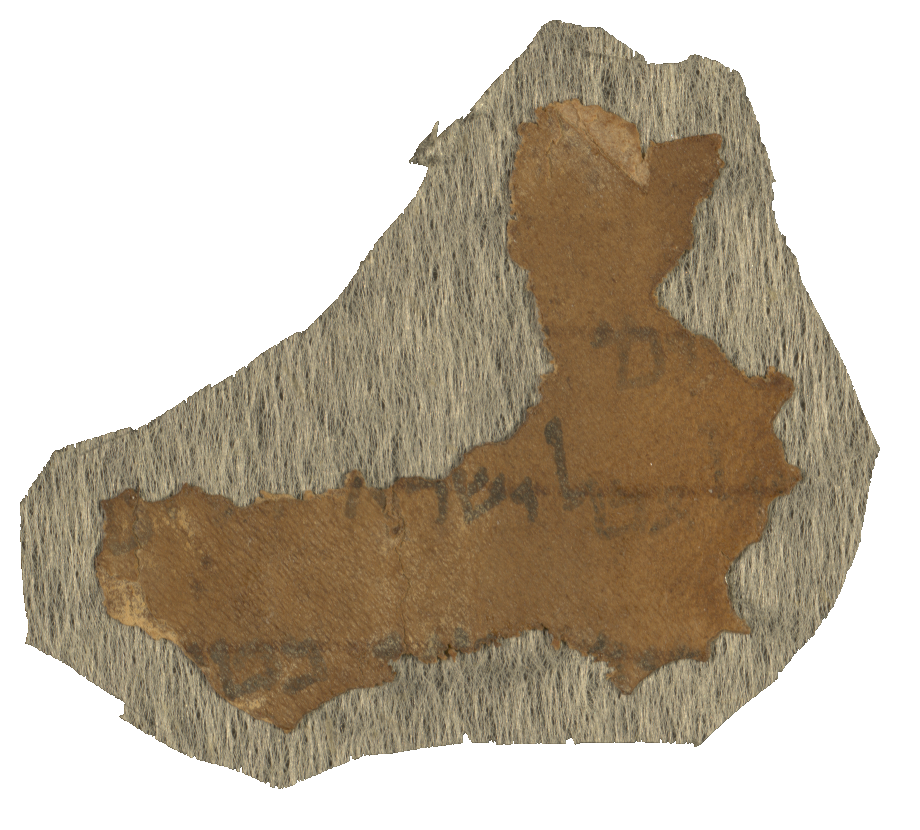

־ים ־
כול גבול ישרא לים
ריך בואי בטי.



In [106]:
dfp980 = df_no_joined_fragments[(df_no_joined_fragments['filename'].str.contains("P980") ) \
                                & (df_no_joined_fragments['side'] == 'recto')]
len(dfp980)
set(dfp980['filename'])
set(dfp980['text_fragment_id'])
# This plate 980 has 1 plates, 1 text_fragment_id, 2 entries, 2 filenames (recto and verso), all from 1 edition and manuscript.
display(dfp980)
image_filename = dfp980[(dfp980['text_fragment_id'] == 803)]['filename'].iloc[0]

from IPython.display import Image
image_full_path = os.path.join(folder_path, 'P980', image_filename.replace('tif', 'png'))
display(Image(image_full_path))
image_text = dfp980[(dfp980['text_fragment_id'] == 803) & (dfp980['side'] == 'recto')]['text_list_str'].iloc[0]
print(image_text)
dfp980.to_csv('dfp980.csv')

In [113]:
print(getTextLines(104, 803, [20])[0])
print(getTextLines(104, 803, [19,20])[0])
print(getTextLines(104, 803, [18,19,20])[0])
# Omitting incomplete symbols results in a more accurate transcription
# Rerunning the transcription pull cell with full omission of 18,19,20

־ים ־
כול גבול ישרא לים
ריך בואי בטי.

־ים ־
ול גבול ישרא לם
י אי בט.

־ים ־
ול גבול ישרא לם
י אי בט.



### Pull non-joined fragments transcriptions while omitting incomplete symbols

In [117]:
# This line involves 10k API calls - pretty heavy duty

def pull_transcriptions(df, df_name, output_path, omitted_attributes):
    df['text'] = df.apply \
    (lambda row: getTextLines(row['edition_id'], row['text_fragment_id'], omitted_attributes), axis=1)
    df.to_csv(df_name + "_backup.csv")

    df['text_list'] = df.apply(lambda row: list(row['text']), axis=1)
    df['text_list_str'] = df.apply(lambda row: (row['text_list'][0]), axis=1)

    df.apply(lambda row: saveTextTofile(row['filename'], row['text_list_str'], output_path), axis=1)
    return df

df_no_joined_fragments = pull_transcriptions(df_no_joined_fragments, "df_no_joined_fragments", \
                   '/specific/disk1/home/alexeyp/Tibetan_Transductive/Data/DSS_texts_no_joins_omit_18_19_20/Texts', \
                                            [18, 19, 20])    



/specific/disk1/home/alexeyp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/specific/disk1/home/alexeyp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/specific/disk1/home/alexeyp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe